In [20]:
import numpy as np
import cmath
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

DFT

In [21]:

def W(N,n):
  return np.round(np.exp(complex(0,(-2*np.pi*n)/N)),3)
###########
def dft_mat(N):
  mat=list()
  for i in range(N):
    a=list()
    for j in range(N):
      a.append(W(N,i*j))
    mat.append(a)
  mat=np.array(mat)
  return mat
 ################
def idft_mat(N):
  mat=list()
  for i in range(N):
    a=list()
    for j in range(N):
      a.append(W(N,-i*j)/N)
    mat.append(a)
  mat=np.array(mat)
  return mat
############

# define DFT
def dft(xn,N):
  xn=np.array(xn)
  Wk=dft_mat(N)
  Xk=np.dot(Wk,xn.T)
  return Xk.tolist()
 
#inverse DFT
def idft(xk,N):
  xk=np.array(xk)
  Wk=idft_mat(N)
  xn=np.dot(Wk,xk.T)
  return xn.tolist()

# #circulant matrix
def Right_shift(list1,n):
  return list1[-n:] + list1[:-n]

#circulant matrix
def circulant_mat(h):
  n=len(h)
  mat=list()
  for i in range(n):
    mat.append(h)
    h=Right_shift(h,1)
  mat=np.array(mat)
  return mat.T

#convolution
def circular_conv(hn,xn):
  xn=np.array(xn)
  mat=circulant_mat(hn)
  yn=np.dot(mat,xn.T)
  return yn.tolist()
    

In [22]:
x=[1,2,3,0,0,0]
h=[1,1,1,1,1,1]
y=circular_conv(x,h)
print(y)

[6, 6, 6, 6, 6, 6]


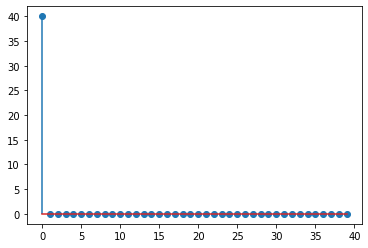

In [23]:
f=30
n=np.arange(0,40,1)
t=(n/100)*10
xn=np.cos(2*np.pi*f*t)
Xk=dft(xn,len(n))
magnitude=[abs(Xk[i]) for i in range(len(Xk))]
plt.stem(magnitude,use_line_collection=True)
plt.show()


In [24]:
x=[1,-3,1,5]
y=[7,-7,-9,-3]
N=4
xk=dft(x,N)
yk=dft(y,N)
# hk=[yk[i]/xk[i] for i in range(N)]
# h=idft(hk,N)
print(xk)
print(yk)


[(4+0j), 8j, 0j, -8j]
[(-12+0j), (16+4j), (8+0j), (16-4j)]


for above input and output the system h(n) will not exist. bcz X(2)=0, and when we will find H(2)=Y(k)/X(k)
that will be not possible.

In [25]:
def energy(x):
  return np.round(sum([abs(i)**2 for i in x]),3)
n=np.arange(0,50,1)
xn=[(.75)**i for i in n]
e1=energy(xn)
Xk=dft(xn,len(xn))
e2=energy(Xk)
print(e1)
print(e2)

2.286
114.308


in above result we can se that e2=N*e1. so this is Parseval's theorem.

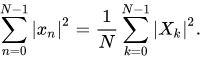

yes! it is possible to find dtfs using dft

DCT


In [26]:
def cm(m):
  if m==0:
    return (1/(2**.5))
  return 1

def dct(xn):
  N=len(xn)
  xm=list()
  for m in range(N):
    sum=0
    for n in range(N):
      sum+=xn[n]*cm(m)*np.cos(np.pi*m*(2*n+1)/(2*N))
    xm.append(np.round(sum*(2/N)**.5,3))
  return xm

def idct(xm):
  N=len(xm)
  xn=list()
  for n in range(N):
    sum=0
    for m in range(N):
      sum+=xm[m]*cm(m)*np.cos(np.pi*m*(2*n+1)/(2*N))
    xn.append(np.round(sum*(2/N)**.5,3))
  return xn

In [27]:
xn=[8,16,24,32,40,48,56,64]
xm=dct(xn)
xn1=idct(xm)
e_xn=energy(xn)
e_xm=energy(xm[0:4])
mse=sum([(xn[i]-xn1[i])**2 for i in range(len(xn))])
print("energy of sequence x(n)=  ",e_xn)
print("energy of first four cosine coeficient = ",e_xm)
print("error= ",np.round(e_xn-e_xm,3))
print("mean square error= ",mse)

energy of sequence x(n)=   13056
energy of first four cosine coeficient =  13053.222
error=  2.778
mean square error=  0.0


in above we can see that the maximum energy of sgnal is in low frequency component of cosine term coefficient

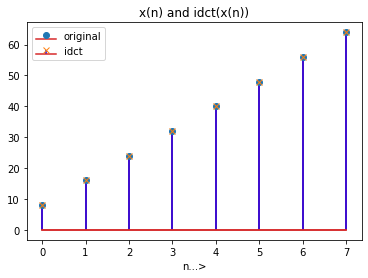

In [28]:
plt.figure(1)
n=np.arange(0,8,1)
plt.stem(n,xn,'r',markerfmt='o',label='original',use_line_collection=True)
plt.stem(n,xn1,'b',markerfmt='x',label='idct',use_line_collection=True)
plt.title("x(n) and idct(x(n))")
plt.xlabel("n...>")
plt.legend()
plt.show()